In [2]:
from qiskit import *
from math import pi
import math
import numpy as np
from qiskit.aqua.operators import CircuitStateFn
from qiskit.aqua.operators.gradients import QFI
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter
import time

In [3]:
numQubits = 4  #Number of Qubits in the circuit
numParametrisedLayers = 2

In [4]:
X = np.random.uniform(-1, 1, numQubits)  #data vector X, normalised between [-1, 1]

In [5]:
params = ParameterVector('θ_', length = numQubits*numParametrisedLayers) #vector of parameters (for the Variational Circuit)
theta_iter = iter(params) #iterates over the instances of vector "params"

In [6]:
def add_layerRZ():
    for i in range(numQubits):
        qf.rz(X[i], i)
    qf.barrier()

In [7]:
def add_layerRZZ():
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qf.cx(i, j)
            qf.rz((pi-X[i])*(pi-X[j]), j)
            qf.cx(i, j)
        qf.barrier()

In [8]:
def make_feature_map():
    for i in range(numQubits):
        qf.h(i)
    qf.barrier()
    add_layerRZ()
    add_layerRZZ()

In [9]:
def add_cnots():
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qf.cx(i, j)
    qf.barrier()

In [10]:
def add_layerRY():
    for qubit in range(numQubits):
        qf.ry(next(theta_iter), qubit)
    qf.barrier()

In [11]:
def make_variationalCircuit():
    add_layerRY()
    add_cnots()
    add_layerRY()

In [12]:
qf = QuantumCircuit(QuantumRegister(numQubits)) 

In [13]:
def make_final_circuit():
    make_feature_map()
    make_variationalCircuit()

In [14]:
make_final_circuit()

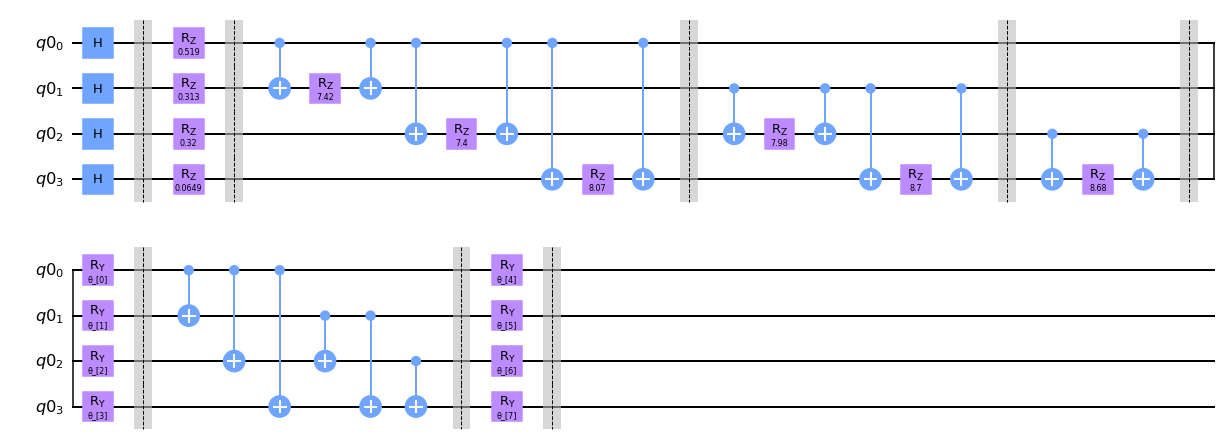

In [15]:
qf.draw('mpl')

In [16]:
state = CircuitStateFn(primitive=qf, coeff=1.)

In [17]:
start_qfi = time.time()
qfi = qiskit.aqua.operators.gradients.QFI(qfi_method='lin_comb_full').convert(operator=state, params=params.params)
values_dict = {params: np.random.uniform(-1, 1, numQubits*numParametrisedLayers)} 
qfi_result = qfi.assign_parameters(values_dict).eval()
end_qfi = time.time()
print(end_qfi - start_qfi)

28.382100820541382


Process ForkProcess-1:
Process ForkProcess-7:
Process ForkProcess-3:
Process ForkProcess-11:
Process ForkProcess-12:
Process ForkProcess-4:
Process ForkProcess-5:
Process ForkProcess-2:
Process ForkProcess-6:
Process ForkProcess-10:
Process ForkProcess-8:
Process ForkProcess-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib

In [18]:
print('full QFI \n', np.real(np.array(qfi_result)))

full QFI 
 [[ 9.99616088e-01  1.74781606e-01  1.78809971e-01 -3.19951245e-01
   7.47433012e-02 -2.88884781e-04 -1.19143758e-01  1.78298010e-01]
 [ 1.74781606e-01  9.99847835e-01  5.26071265e-01  3.26637434e-02
  -3.23417426e-03  2.27467734e-01 -1.88385794e-03 -4.10545701e-03]
 [ 1.78809971e-01  5.26071265e-01  9.99834678e-01  3.24630664e-02
  -3.37109750e-03  1.89571578e-04 -3.63913825e-01 -9.51155508e-04]
 [-3.19951245e-01  3.26637434e-02  3.24630664e-02  9.99941848e-01
   1.99934700e-03 -1.12432040e-04  1.16458961e-03 -2.10821077e-02]
 [ 7.47433012e-02 -3.23417426e-03 -3.37109750e-03  1.99934700e-03
   9.31259409e-01  2.58066034e-01  1.35723774e-01 -1.24035811e-01]
 [-2.88884781e-04  2.27467734e-01  1.89571578e-04 -1.12432040e-04
   2.58066034e-01  9.99782621e-01 -2.80260020e-02 -2.17620844e-01]
 [-1.19143758e-01 -1.88385794e-03 -3.63913825e-01  1.16458961e-03
   1.35723774e-01 -2.80260020e-02  9.76677090e-01 -6.27612546e-02]
 [ 1.78298010e-01 -4.10545701e-03 -9.51155508e-04 -2.10821

In [19]:
fisher_matrix = np.real(np.array(qfi_result))

In [20]:
def V_theta():
    return (2*pi)**(numQubits*numParametrisedLayers)

In [37]:
start = time.time()
from scipy import integrate
def f(w,x,y,z,s,t,u):
    return 1
integrate.nquad(f, [[0,2*pi],[0,2*pi],[0,2*pi],[0,2*pi],[0,2*pi],[0,2*pi],[0,2*pi]])
end = time.time()

In [38]:
end-start

2569.8456914424896

In [46]:
def normalised_matrix():
    denominator = 2*pi*np.trace(fisher_matrix)          #integrate.quad(np.trace(fisher_matrix), 0, 2*pi)
    d = numQubits*numParametrisedLayers
    return d*(V_theta()/denominator)*fisher_matrix

In [47]:
normalised_matrix()

array([[ 3.99521414e+05,  1.78982977e+05,  1.93640800e+05,
         2.64845697e+05, -8.15670241e+03,  7.36988120e+02,
        -1.29534693e+04,  1.01120541e+05],
       [ 1.78982977e+05,  3.99529456e+05,  1.47461452e+05,
         1.79162371e+05,  6.38045720e+01, -7.31445994e+04,
        -1.04102331e+00,  9.80090628e+03],
       [ 1.93640800e+05,  1.47461452e+05,  3.99526756e+05,
         1.93732235e+05,  1.60356570e+02, -4.51422899e+02,
         1.31371895e+05, -3.19816139e+02],
       [ 2.64845697e+05,  1.79162371e+05,  1.93732235e+05,
         3.99521746e+05, -2.56673261e+02,  7.22565889e+02,
         4.18783230e+00,  1.16788708e+03],
       [-8.15670241e+03,  6.38045720e+01,  1.60356570e+02,
        -2.56673261e+02,  3.91513192e+05, -1.04357494e+05,
         1.04092507e+04, -6.63896580e+04],
       [ 7.36988120e+02, -7.31445994e+04, -4.51422899e+02,
         7.22565889e+02, -1.04357494e+05,  3.35997870e+05,
         1.12050170e+03,  6.65672347e+04],
       [-1.29534693e+04, -1.041023

In [49]:
np.trace(normalised_matrix())*2*pi/V_theta()

8.000000000000002

In [50]:
def effective_dimension(n, gamma):
    factor = (gamma*n)/(2*pi*math.log10(n))
    determinant = np.linalg.det(factor*fisher_matrix + np.identity(fisher_matrix.shape[0]))
    integrate_det = 2*pi*determinant**0.5
    return 2*math.log10(integrate_det/V_theta())/math.log10(factor)

In [54]:
nos = np.arange(2, 100, 10) #no of data samples (can't be taken as 1, otherwise log(1) gives division by zero error)
gamma = np.linspace(0.01, 1.0, num = 20)

In [55]:
for i in range(20):
    for j in range(20):
        print("n : {}, gamma : {}, Effective Dimension : {}".format(nos[i], gamma[j], effective_dimension(nos[i], gamma[j])))

n : 2, gamma : 0.01, Effective Dimension : 5.637950433400491
n : 2, gamma : 0.06210526315789474, Effective Dimension : 9.270304595640445
n : 2, gamma : 0.11421052631578947, Effective Dimension : 11.763130964275724
n : 2, gamma : 0.16631578947368422, Effective Dimension : 14.10251713526196
n : 2, gamma : 0.21842105263157896, Effective Dimension : 16.496245686374248
n : 2, gamma : 0.2705263157894737, Effective Dimension : 19.06194385912007
n : 2, gamma : 0.32263157894736844, Effective Dimension : 21.902441494342032
n : 2, gamma : 0.37473684210526315, Effective Dimension : 25.13224918544087
n : 2, gamma : 0.4268421052631579, Effective Dimension : 28.897145492272493
n : 2, gamma : 0.4789473684210527, Effective Dimension : 33.39854498724044
n : 2, gamma : 0.5310526315789474, Effective Dimension : 38.93245394773889
n : 2, gamma : 0.5831578947368421, Effective Dimension : 45.960014557394004
n : 2, gamma : 0.6352631578947369, Effective Dimension : 55.247892737814865
n : 2, gamma : 0.6873684210

IndexError: index 10 is out of bounds for axis 0 with size 10